# Ratings Prediction Project:-
Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.
Follow the complete life cycle of data science. Include all the steps like:-                                              
1. Data Cleaning                                              
2. Exploratory Data Analysis                                  
3. Data Preprocessing                                        
4. Model Building                                             
5. Model Evaluation                                           
6. Selecting the best mode                                    

In [1]:
# lets import all required libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy as stats
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import string
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# lets import csv file which we scrapped to jupyter notebook
df=pd.read_csv("rating_review.csv")
df

,Unnamed: 0,Review Title,Full Review,Ratings
0,0,Doesnt have IPS display nor the fingerprint sc...,"\n I received a 15"" laptop when I ordered thi...",2.0 out of 5 stars
1,1,Better options are there in other brands.. Dis...,"\n Display is really not good, by spending 1 ...",2.0 out of 5 stars
2,2,when ur in a huddle of ur work it get restarts...,\n pls dont buy it was getting restarted unkn...,2.0 out of 5 stars
3,3,Display screen is worst.,\n Display Screen is not good.\n,2.0 out of 5 stars
4,4,Ok laptop if u r not using more than 5-6 hrs a...,\n &nbsp;This laptop is good only if u use a ...,2.0 out of 5 stars
...,...,...,...,...
65699,65699,Best router for openwrt 64MB RAM with 8MP Flas...,\n I have purchased this router for custom fr...,4.0 out of 5 stars
65700,65700,Good Product,\n Product is good but TP-Link never mention ...,4.0 out of 5 stars
65701,65701,Product is good.. Installation is not easy,\n The product is good and working fine... Th...,4.0 out of 5 stars
65702,65702,Okay product,\n Everything is perfect . Checked with Jio a...,4.0 out of 5 stars


In [3]:
# lets check the top five rows of the dataset
df.head()

,Unnamed: 0,Review Title,Full Review,Ratings
0,0,Doesnt have IPS display nor the fingerprint sc...,"\n I received a 15"" laptop when I ordered thi...",2.0 out of 5 stars
1,1,Better options are there in other brands.. Dis...,"\n Display is really not good, by spending 1 ...",2.0 out of 5 stars
2,2,when ur in a huddle of ur work it get restarts...,\n pls dont buy it was getting restarted unkn...,2.0 out of 5 stars
3,3,Display screen is worst.,\n Display Screen is not good.\n,2.0 out of 5 stars
4,4,Ok laptop if u r not using more than 5-6 hrs a...,\n &nbsp;This laptop is good only if u use a ...,2.0 out of 5 stars


In [4]:
#lets check the last five rows of the dataset
df.tail()

,Unnamed: 0,Review Title,Full Review,Ratings
65699,65699,Best router for openwrt 64MB RAM with 8MP Flas...,\n I have purchased this router for custom fr...,4.0 out of 5 stars
65700,65700,Good Product,\n Product is good but TP-Link never mention ...,4.0 out of 5 stars
65701,65701,Product is good.. Installation is not easy,\n The product is good and working fine... Th...,4.0 out of 5 stars
65702,65702,Okay product,\n Everything is perfect . Checked with Jio a...,4.0 out of 5 stars
65703,65703,NaN,NaN,NaN


# Exploratory Data Analysis (EDA):

In [5]:
# Lets check the name of columns present in the dataset
df.columns

Index(['Unnamed: 0', 'Review Title', 'Full Review', 'Ratings'], dtype='object')

* Here we can see that there are 4 columns present in the dataset, we can see that there is a column named Unnamed: 0 which shows the count of rows, we dont require this column as jupyter notebook by default shows the row no.'s, so, we will drop this column

In [6]:
df.drop(columns= "Unnamed: 0", inplace=True)

* Here we have successfully dropped the unwanted column.

In [7]:
# lets check the shape of column present in the dataset
df.shape

(65704, 3)

* Here we can see that we have 65704 rows present in 3 columns.

In [8]:
# lets check the imformation in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65704 entries, 0 to 65703
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review Title  54679 non-null  object
 1   Full Review   54846 non-null  object
 2   Ratings       54680 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


* Here we can clearly observe that there are few rows with null or NaN values present, Which we need to properly check and handle

In [9]:
# lets check the presence of Null or NaN values in the dataset
df.isnull().sum()

Review Title    11025
Full Review     10858
Ratings         11024
dtype: int64

* Here we can see lot of null values present in the dataset, we can't afford to lose almost 20% percent of the data.

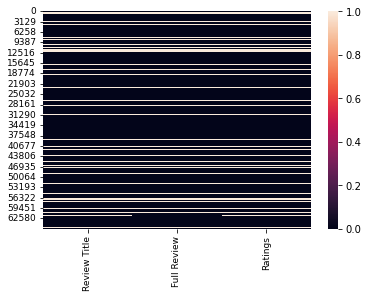

In [10]:
# lets import seaborn for visualiztion
import seaborn as sns
# lets check and visualize Null or NaN values using heatmap
sns.heatmap(df.isnull())
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.show()

* Here also we can clearly see that null values are present in the dataset.Now lets Handle these null or NaN values using the imputation technique.

# Imputation technique:

In [11]:
# lets check the mode of Review Title column
df["Review Title"].mode()

0    Good
dtype: object

* Here we can see that mode or highest occurence Review Title is Good, So, we will replace NaN values in this column with Good.

In [12]:
# lets check the mode of Full Review column
df["Full Review"].mode()

0    \n  Good\n
dtype: object

* Here in Full Review column as well we can see that Highest Occurence or Mode is Good, So, in Full Review Column also we will replace null or NaN values with Good.

In [13]:
# lets check the mode of Ratings Column
df["Ratings"].mode()

0    5.0 out of 5 stars
dtype: object

* Here we can see that most of the Occurence of rating is 5.0 in Ratings Column, So, We will replace Null or NaN values present in the Ratings column with 5 or 5.0.

In [14]:
# lets replace the NaN values with modes of that particular column
df["Review Title"]=df["Review Title"].fillna(df["Review Title"].mode()[0])
df["Full Review"]=df["Full Review"].fillna(df["Full Review"].mode()[0])
df["Ratings"]=df["Ratings"].fillna(df["Ratings"].mode()[0])

In [15]:
# lets check the presence of Null or NaN values once again
df.isnull().sum()

Review Title    0
Full Review     0
Ratings         0
dtype: int64

* Here we have successfully replaced the Null or NaN values of all the columns with the Mode of that particular column.

In [16]:
# lets check the unique values present in all the columns
df.nunique()

Review Title    33838
Full Review     41842
Ratings             5
dtype: int64

In [17]:
# Now lets check the value counts in column Ratings
df["Ratings"].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [18]:
# lets replace the string entries in our target column
df["Ratings"]=df["Ratings"].replace("1.0 out of 5 stars",1)
df["Ratings"]=df["Ratings"].replace("2.0 out of 5 stars",2)
df["Ratings"]=df["Ratings"].replace("3.0 out of 5 stars",3)
df["Ratings"]=df["Ratings"].replace("4.0 out of 5 stars",4)
df["Ratings"]=df["Ratings"].replace("5.0 out of 5 stars",5)
df["Ratings"]=df["Ratings"].astype('int')

In [19]:
# lets check the value counts of Ratings which is our target column
df["Ratings"].unique()

array([2, 3, 1, 5, 4])

* So, Here we have successfully converted our target column from object to integer, which now will help better in our analysis.

# Combining Review Title and Full Review Column:

In [20]:
# lets combine Both Review Title and Full Review Column to Make only one Review Column which will help better in our analysis
df["Review"]=df["Review Title"].map(str)+' '+df["Full Review"]
df

,Review Title,Full Review,Ratings,Review
0,Doesnt have IPS display nor the fingerprint sc...,"\n I received a 15"" laptop when I ordered thi...",2,Doesnt have IPS display nor the fingerprint sc...
1,Better options are there in other brands.. Dis...,"\n Display is really not good, by spending 1 ...",2,Better options are there in other brands.. Dis...
2,when ur in a huddle of ur work it get restarts...,\n pls dont buy it was getting restarted unkn...,2,when ur in a huddle of ur work it get restarts...
3,Display screen is worst.,\n Display Screen is not good.\n,2,Display screen is worst. \n Display Screen is...
4,Ok laptop if u r not using more than 5-6 hrs a...,\n &nbsp;This laptop is good only if u use a ...,2,Ok laptop if u r not using more than 5-6 hrs a...
...,...,...,...,...
65699,Best router for openwrt 64MB RAM with 8MP Flas...,\n I have purchased this router for custom fr...,4,Best router for openwrt 64MB RAM with 8MP Flas...
65700,Good Product,\n Product is good but TP-Link never mention ...,4,Good Product \n Product is good but TP-Link n...
65701,Product is good.. Installation is not easy,\n The product is good and working fine... Th...,4,Product is good.. Installation is not easy \n ...
65702,Okay product,\n Everything is perfect . Checked with Jio a...,4,Okay product \n Everything is perfect . Check...


* Here we have successfully combined both the columns to make one column name review, lets now drop Both Review Title and Full Review column to avoid duplication

In [21]:
# lets drop the columns which are now not required
df.drop(columns=["Review Title","Full Review"], inplace=True)

* Here we have successfully dropped the columns which are not required for our analysis now.

# Text Processing:

In [22]:
# lets check the data in review column
df["Review"][0]

'Doesnt have IPS display nor the fingerprint scanner or face Id worked! \n  I received a 15" laptop when I ordered this (same model) but that is not the problem, the problem is that the laptop doesn\'t have IPS display and the colors in the screen are also dissatisfactory. Neither the fingerprint scanner nor the face ID works in this, it says u do not have the driver but even after downloading the right drivers from the official website it is unable to install. I could not return the laptop as I had to use it urgently. Horrible experience.\n'

In [23]:
df['Review'][1]

'Better options are there in other brands.. Display is not good and heating issues \n  Display is really not good, by spending 1 to 2 thousand extra we can get HP, display in HP are good.<br>Facing heating issue when opened multiple programs.  Build quality is also average.<br>Some problem is there in software also, suddenly nothing is working, forced to restart, in 2 weeks time i faced 3 times.\n'

In [24]:
df['Review'][2]

'when ur in a huddle of ur work it get restarts automatically \n  pls dont buy it was getting restarted unknowingly which is irritating when ur in ur work\n'

In [25]:
df['Review'][3]

'Display screen is worst. \n  Display Screen is not good.\n'

In [26]:
df['Review'][4]

"Ok laptop if u r not using more than 5-6 hrs a day \n  &nbsp;This laptop is good only if u use a cooling pad  or else it get over heated when that happens it turns black and switchtches off so it's not good<br>Even for a student if ur attending classes more than 5-6 hrs it gets heated stuck and shuts down also it's not too fast initially it was very fast but then later became slow usable ram is 5.9 gb not 8gb also only 470gb storage if even the data Is just 30gb out of 470 it gets slow it is not for gaming<br>As soon as u update to windows 11 the laptop gets worse but at this rate it is ok and does its job there is a bit of anti glare not so effective screen brightness is not so good and charge holds good for 2 hrs max with internet<br>It's mic and sound is worst<br>For this rate u could go for someother laptops<br>But still it's managable<br>It boots fast ⏩ and the product is flimsy<br>and not sturdy the track pad is gone after 1 week even after using external mouse<br>Warranty is fo

In [27]:
#Lets replace some of the words to their full form and removing some unwanted text using function 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"⏩", " ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text)
    return text

In [28]:
# lets replace all words to Lowercase
df["Review"]=df["Review"].apply(lambda x : x.lower())
df["Review"]=df["Review"].apply(lambda x : decontracted(x))

In [29]:
# lets remove punctuation from the dataset to get better performance
df["Review"]=df["Review"].str.replace("[^\w\s]"," ")
df["Review"]=df["Review"].str.replace("\n"," ")

In [30]:
# lets check the text again to see the changes
df["Review"][0]

'doesnt have ips display nor the fingerprint scanner or face id worked     i received a 15  laptop when i ordered this  same model  but that is not the problem  the problem is that the laptop does not have ips display and the colors in the screen are also dissatisfactory  neither the fingerprint scanner nor the face id works in this  it says u do not have the driver but even after downloading the right drivers from the official website it is unable to install  i could not return the laptop as i had to use it urgently  horrible experience  '

In [31]:
df["Review"][1]

'better options are there in other brands   display is not good and heating issues    display is really not good  by spending 1 to 2 thousand extra we can get hp  display in hp are good  facing heating issue when opened multiple programs   build quality is also average  some problem is there in software also  suddenly nothing is working  forced to restart  in 2 weeks time i faced 3 times  '

In [32]:
df["Review"][2]

'when ur in a huddle of ur work it get restarts automatically    pls dont buy it was getting restarted unknowingly which is irritating when ur in ur work '

In [33]:
df["Review"][4]

'ok laptop if u r not using more than 5 6 hrs a day     nbsp this laptop is good only if u use a cooling pad  or else it get over heated when that happens it turns black and switchtches off so it is not good even for a student if ur attending classes more than 5 6 hrs it gets heated stuck and shuts down also it is not too fast initially it was very fast but then later became slow usable ram is 5 9 gb not 8gb also only 470gb storage if even the data is just 30gb out of 470 it gets slow it is not for gaming as soon as u update to windows 11 the laptop gets worse but at this rate it is ok and does its job there is a bit of anti glare not so effective screen brightness is not so good and charge holds good for 2 hrs max with internet it is mic and sound is worst for this rate u could go for someother laptops but still it is managable it boots fast   and the product is flimsy and not sturdy the track pad is gone after 1 week even after using external mouse warranty is for 1 year and antiviru

* Here we can see that we have successfully removed unwanted text and converted some text to its full form.

# Stop Words:

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# lets remove predifined stopwords
s=stopwords.words("english")
df["Review"]=df["Review"].apply(lambda x: " ".join([word for word in x.split() if word not in (s)]))

In [36]:
# lets check the data again after removing stopwords
df["Review"][0]

'doesnt ips display fingerprint scanner face id worked received 15 laptop ordered model problem problem laptop ips display colors screen also dissatisfactory neither fingerprint scanner face id works says u driver even downloading right drivers official website unable install could return laptop use urgently horrible experience'

In [37]:
df["Review"][4]

'ok laptop u r using 5 6 hrs day nbsp laptop good u use cooling pad else get heated happens turns black switchtches good even student ur attending classes 5 6 hrs gets heated stuck shuts also fast initially fast later became slow usable ram 5 9 gb 8gb also 470gb storage even data 30gb 470 gets slow gaming soon u update windows 11 laptop gets worse rate ok job bit anti glare effective screen brightness good charge holds good 2 hrs max internet mic sound worst rate u could go someother laptops still managable boots fast product flimsy sturdy track pad gone 1 week even using external mouse warranty 1 year antivirus 1 month trial overall laptop best market cons things good laptop'

* Here we can see that we have successfully removed stopwords from the dataset.

# Lemmatization :

In [38]:
# initialising Lemmatizer
lem = nltk.stem.WordNetLemmatizer()

In [39]:
# lets convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith("J"):
        return wordnet.ADJ
    elif nltk_tag.startswith("V"):
        return wordnet.VERB
    elif nltk_tag.startswith("N"):
        return wordnet.NOUN
    elif nltk_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None

In [43]:
# lets lemmatize text in our dataset now
def lemmatize_sentence(sentence):
    n_tag=nltk.pos_tag(nltk.word_tokenize(sentence))
    w_tag=map(lambda x: (x[0],nltk_tag_to_wordnet_tag(x[1])),n_tag)
    lemmatize_sentence=[]
    for word, tag in w_tag:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lem.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [44]:
df["Review"]=df["Review"].apply(lambda x : lemmatize_sentence(x))

In [45]:
# lets check the data again after lemmatization
df["Review"][0]

'doesnt ip display fingerprint scanner face id work receive 15 laptop order model problem problem laptop ip display color screen also dissatisfactory neither fingerprint scanner face id work say u driver even download right driver official website unable install could return laptop use urgently horrible experience'

In [46]:
df["Review"][4]

'ok laptop u r use 5 6 hrs day nbsp laptop good u use cool pad else get heat happens turn black switchtches good even student ur attend class 5 6 hr get heat stuck shuts also fast initially fast late become slow usable ram 5 9 gb 8gb also 470gb storage even data 30gb 470 get slow gaming soon u update window 11 laptop get bad rate ok job bit anti glare effective screen brightness good charge hold good 2 hr max internet mic sound bad rate u could go someother laptop still managable boot fast product flimsy sturdy track pad go 1 week even use external mouse warranty 1 year antivirus 1 month trial overall laptop best market con thing good laptop'

# Standardization:
                            Text Normalization

In [47]:
# lets normalise the Text through Noice removal
def scrub_words(text):
    # lets remove non ascii and digits
    text=re.sub("\\d"," ",text)
    text=re.sub("\\W"," ",text)
    # lets remove extra white space
    text=text.strip()
    # lets remove html markup
    text=re.sub("(<.*?>)"," ",text)
    return text

In [48]:
df["Review"]=df["Review"].apply(lambda x : scrub_words(x))

In [49]:
# lets check the changes in the dataset once again
df["Review"][0]

'doesnt ip display fingerprint scanner face id work receive    laptop order model problem problem laptop ip display color screen also dissatisfactory neither fingerprint scanner face id work say u driver even download right driver official website unable install could return laptop use urgently horrible experience'

In [50]:
df["Review"][4]

'ok laptop u r use     hrs day nbsp laptop good u use cool pad else get heat happens turn black switchtches good even student ur attend class     hr get heat stuck shuts also fast initially fast late become slow usable ram     gb  gb also    gb storage even data   gb     get slow gaming soon u update window    laptop get bad rate ok job bit anti glare effective screen brightness good charge hold good   hr max internet mic sound bad rate u could go someother laptop still managable boot fast product flimsy sturdy track pad go   week even use external mouse warranty   year antivirus   month trial overall laptop best market con thing good laptop'

* Now the data seems refined and good to go to our next step i.e. Visualization.

# Visualization:

# character count:

In [51]:
# lets create column for character count in the text in our dataset
df["Char_Count"]=df["Review"].str.len()
df[["Char_Count","Review"]].head()

,Char_Count,Review
0,314,doesnt ip display fingerprint scanner face id ...
1,264,good option brand display good heating issue d...
2,101,ur huddle ur work get restarts automatically p...
3,38,display screen bad display screen good
4,648,ok laptop u r use hrs day nbsp laptop good...


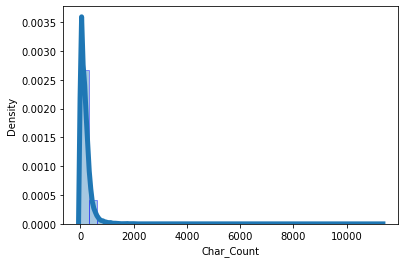

In [52]:
# lets visualize using histogram of all character count
sns.distplot(df["Char_Count"],hist=True,kde=True,
            bins=int(180/5),hist_kws={'edgecolor':"blue"},
            kde_kws={"linewidth":5})
plt.show()

* Here we can see the histogram of Character Count of Review of our dataset.

# Word Counts:

In [53]:
# lets create columns to properly visualize word counts
df["Word_Count"]=df["Review"].apply(lambda x: len(str(x).split(" ")))
df[["Word_Count","Review"]].head()

,Word_Count,Review
0,48,doesnt ip display fingerprint scanner face id ...
1,48,good option brand display good heating issue d...
2,17,ur huddle ur work get restarts automatically p...
3,6,display screen bad display screen good
4,145,ok laptop u r use hrs day nbsp laptop good...


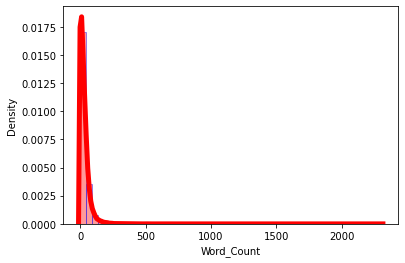

In [54]:
# lets visualize this using histogram of Word Count
sns.distplot(df["Word_Count"],hist=True,kde=True,
            color='r', hist_kws={'edgecolor':'blue'},
            kde_kws={"linewidth":5})
plt.show()

* Histogram of Both Char_Count and Word_Count are similar.

# Outliers:

In [55]:
# lets check the shape of dataset
df.shape

(65704, 4)

* Here we are assuming very lengthy reviews as outliers and we will treat them using z_score method.

In [56]:
# lets import libraries for zscore
from scipy import stats
from scipy.stats import zscore
# lets apply zscore to remove outliers from the review
z=zscore(df[["Word_Count"]])
abs_z_score=np.abs(z)
zs=(abs_z_score < 3).all(axis=1)
df=df[zs]
df.shape

(64663, 4)

* Using zscore method we have lost close to 1.5% data, which falls under acceptable limit of below 10%.

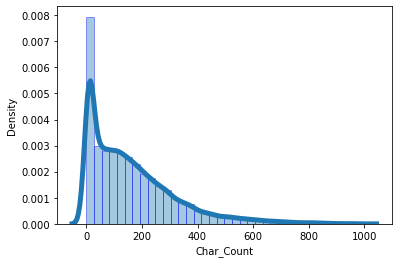

In [57]:
# lets visualize again using histogram of all character count
sns.distplot(df["Char_Count"],hist=True,kde=True,
            bins=int(180/5),hist_kws={'edgecolor':"blue"},
            kde_kws={"linewidth":5})
plt.show()

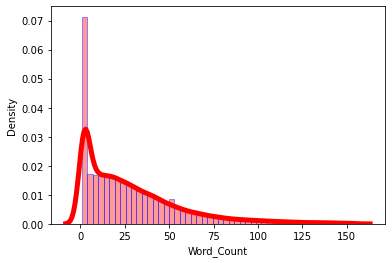

In [58]:
# lets visualize again using histogram
sns.distplot(df["Word_Count"],hist=True,kde=True,
            color='r', hist_kws={'edgecolor':'blue'},
            kde_kws={"linewidth":5})
plt.show()

* Here we can clearly see that after removing outliers we can clearly visualize the good range of Count of Characters and Words.

In [59]:
# lets visualize top 25 most frequent words using bar plot
def f_words(x, terms=25):
    all=" ".join([text for text in x])
    all=all.split()
    fdis=FreqDist(all)
    words_df=pd.DataFrame({"word":list(fdis.keys()),
                          "count":list(fdis.values())})
    # top 25 most frequent words
    d=words_df.nlargest(columns="count",n=terms)
    plt.figure(figsize=(27,18))
    ax=sns.barplot(data=d,x="count",y="word")
    ax.set(ylabel="word")
    plt.show()

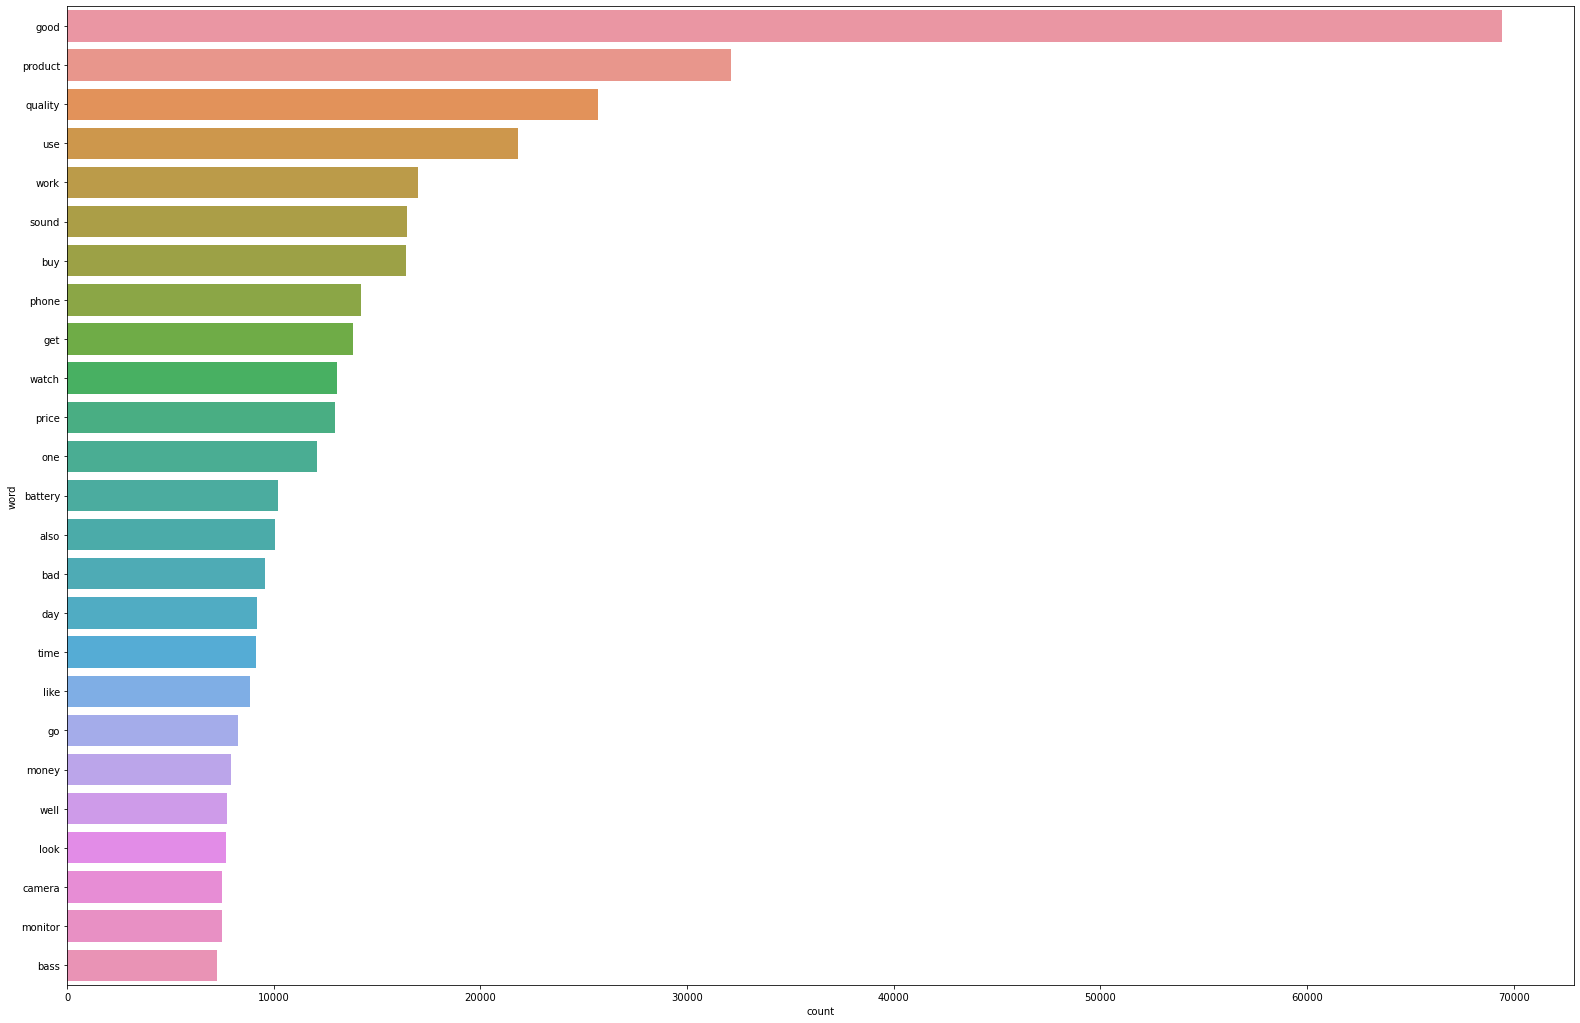

In [60]:
f_words(df["Review"])

* After observing above plot we can clearly see that Good is the most frequent word used in reviews, followed by Product, Quality and Use.

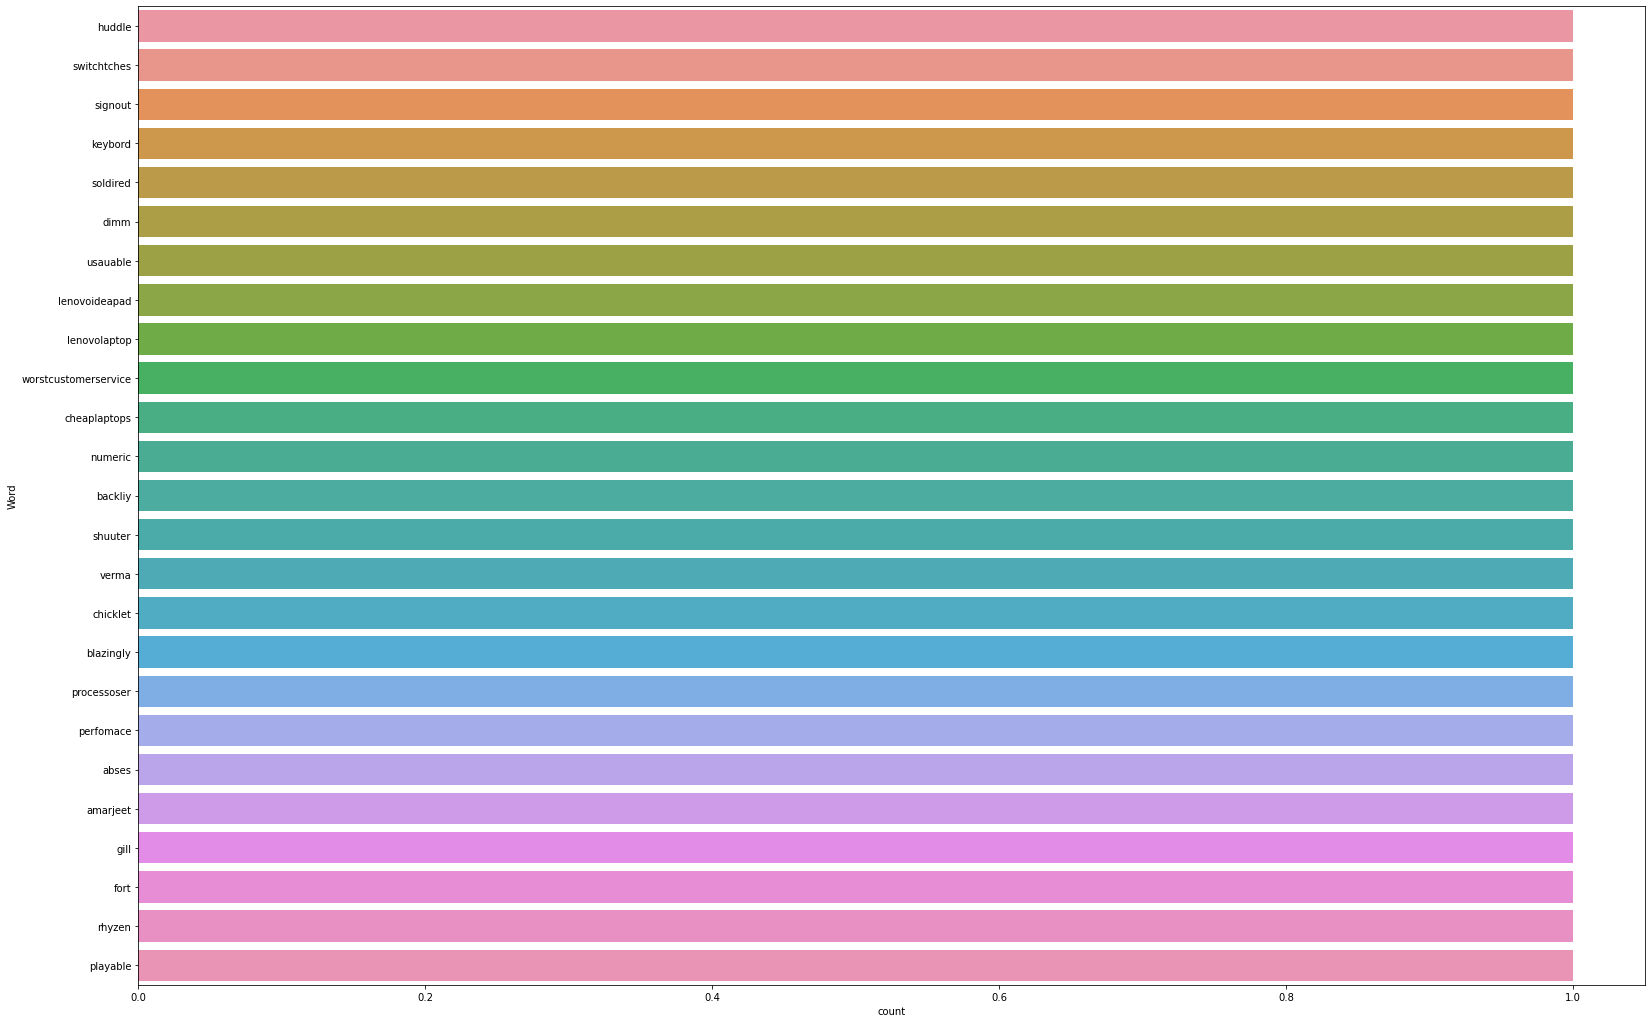

In [61]:
# Now lets check 25 Least used words:
def r_words(x, terms = 25):
    r_w = ' '.join([text for text in x])
    r_w = r_w.split()
    fdist = FreqDist(r_w)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #lets view top 25 least used words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (27,18))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
r_words(df["Review"])

* Here we can see the list of all the characters which are used the least or in this case these words are used only 1.

# WordCloud :

In [62]:
# lets first import library for wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
def s_wordcloud(data,title=None):
    wordcloud=WordCloud(background_color='white',
                       stopwords=stopwords,
                       max_words=250,
                       max_font_size=36,
                       scale=3,
                       random_state=1).generate(str(data))
    f=plt.figure(1,figsize=(18,18))
    plt.axis("off")
    if title:
        fig.suptitle(title,fontsize=18)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

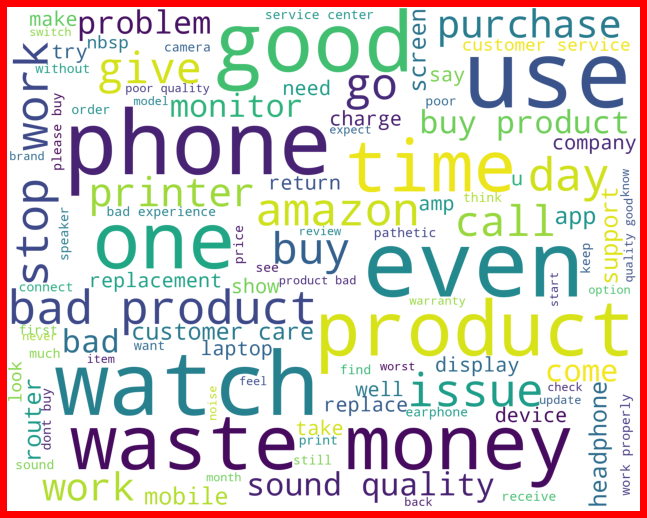

In [63]:
# lets plot the loud words with 1 Rating
df1=df["Review"][df["Ratings"]==1]
spam_cloud = WordCloud(width=540,height=430,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))
plt.figure(figsize=(9,7),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

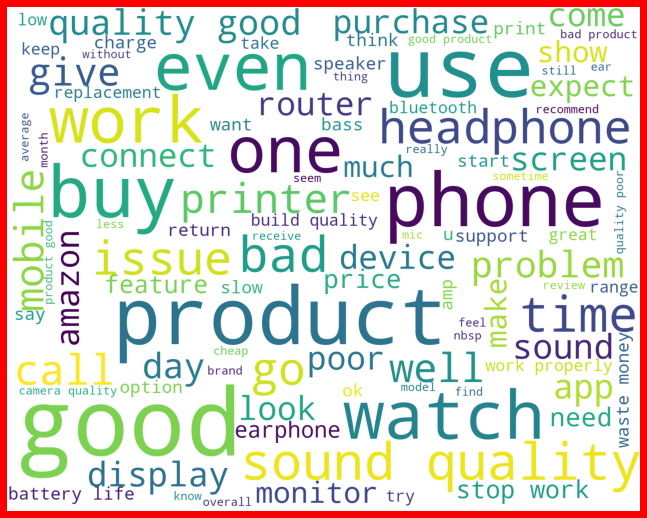

In [64]:
# lets plot the loud words with 2 Rating
df1=df["Review"][df["Ratings"]==2]
spam_cloud = WordCloud(width=540,height=430,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))
plt.figure(figsize=(9,7),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

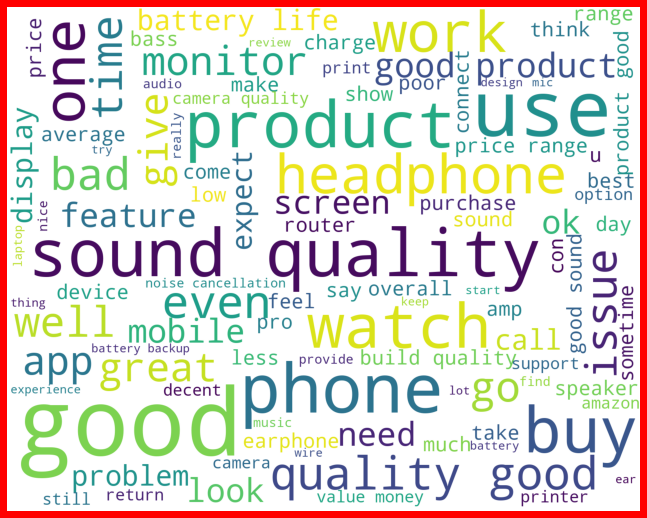

In [65]:
# lets plot the loud words with 3 Rating
df1=df["Review"][df["Ratings"]==3]
spam_cloud = WordCloud(width=540,height=430,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))
plt.figure(figsize=(9,7),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

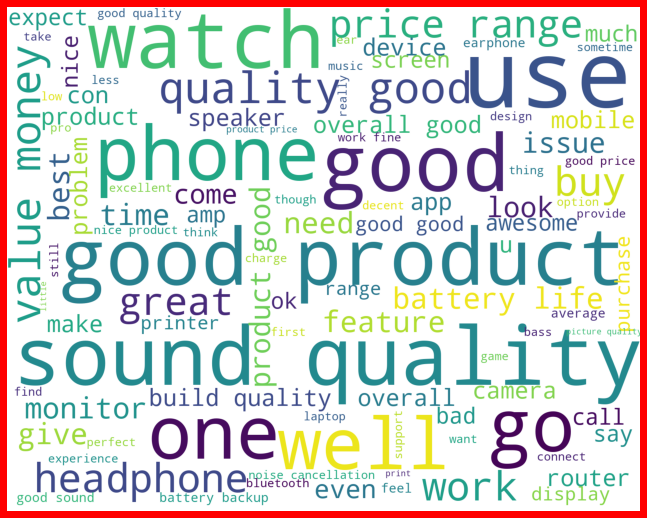

In [66]:
# lets plot the loud words with 4 Rating
df1=df["Review"][df["Ratings"]==4]
spam_cloud = WordCloud(width=540,height=430,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))
plt.figure(figsize=(9,7),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

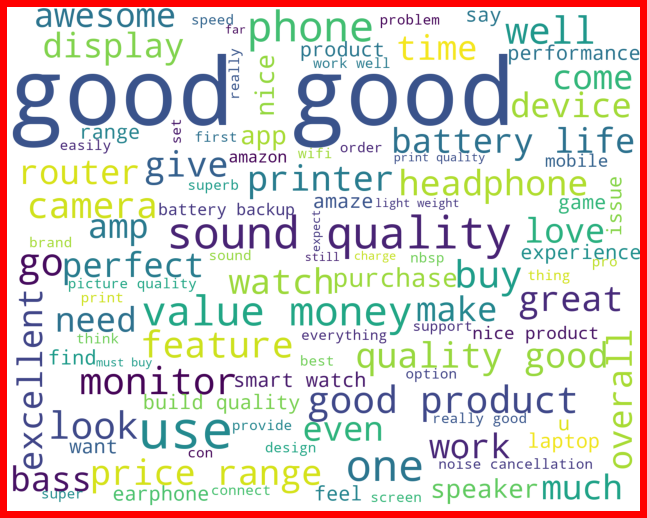

In [67]:
# lets plot the loud words with 5 Rating
df1=df["Review"][df["Ratings"]==5]
spam_cloud = WordCloud(width=540,height=430,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))
plt.figure(figsize=(9,7),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

* Here in the above figures we can clearly see Reviews opinion on products.
* We can see the most frequent words used for each ratings which are shown in the word cloud

In [68]:
# lets check the value counts of ratings columns
df.Ratings.value_counts()

5    23617
1    11337
4    11166
3     9825
2     8718
Name: Ratings, dtype: int64

# Model Selection :

In [69]:
# lets seperate feature columns to variable x and target column to variable y
x=df["Review"]
y=df["Ratings"]

# Vectorization :
    lets convert text data into vectors using Tfidf Vectorizer

In [70]:
# lets import library first for Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
wv=TfidfVectorizer(sublinear_tf =True,
                  strip_accents= 'unicode',
                  analyzer='word',
                  token_pattern=r"\w{1,}",
                  stop_words='english',
                  ngram_range=(1,3),
                  max_features=100000)
wv.fit(x)
train_word_features=wv.transform(x)

In [71]:
cv = TfidfVectorizer(
                    sublinear_tf = True,
                    strip_accents = 'unicode',
                    analyzer = 'char',
                    stop_words = 'english',
                    ngram_range = (2,6),
                    max_features = 50000)
cv.fit(x)
train_char_features = cv.transform(x)

In [72]:
# lets combine both word vector and character vector
# lets first import required library
from scipy.sparse import hstack
train_features=hstack([train_char_features,train_word_features])

In [73]:
# lets first import library for train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
seed=1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

In [74]:
# lets check value count of ratings column
y.value_counts()

5    23617
1    11337
4    11166
3     9825
2     8718
Name: Ratings, dtype: int64

In [75]:
# lets check the no. of classes before fit
from collections import Counter
print("The Number of classes before fit{}".format(Counter(y_train)))

The Number of classes before fitCounter({5: 17680, 1: 8484, 4: 8383, 3: 7420, 2: 6530})


* Here we can see that maximum count is of 5 rating which stands at 17680, lets oversample all ratings to 17680.

In [76]:
# lets balance the dataset using SMOTE
# lets import libraries for Smote
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
os=SMOTE(sampling_strategy={1:17680,2:17680,3:17680,4:17680,5:17680})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 17680, 1: 8484, 4: 8383, 3: 7420, 2: 6530})
The number of classes after fit Counter({2: 17680, 5: 17680, 4: 17680, 1: 17680, 3: 17680})


In [77]:
# lets import all libraries for ML Algorithms
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

In [78]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
xgb = XGBClassifier(verbosity=0)
lgb = LGBMClassifier()
sgd = SGDClassifier()

In [79]:
#lets create a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [80]:
for model in [lr,dtc,svc,sgd,rfc,xgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 66.43572930842508
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.68      0.76      0.72      2853
           2       0.52      0.47      0.50      2188
           3       0.50      0.49      0.50      2405
           4       0.52      0.56      0.54      2783
           5       0.85      0.81      0.83      5937

    accuracy                           0.66     16166
   macro avg       0.61      0.62      0.62     16166
weighted avg       0.67      0.66      0.66     16166

Confusion Matrix : 
 [[2164  362  229   64   34]
 [ 563 1033  385  140   67]
 [ 265  363 1180  452  145]
 [  90  138  386 1555  614]
 [  83   77  176  793 4808]]

******************************DecisionTreeClassifier******************************
Accuracy Score: 62.66856365210936
----------------------------------------

# Cross Validation Score:

In [81]:
# lets check cross validation scores of all models as well
def cross_val(model):
    print('*'*25+model.__class__.__name__+'*'*25)
    score=cross_val_score(model,train_features,y,cv=3).mean()*100
    print("Cross Validation Score : ",score)

In [ ]:
for model in [lr,dtc,svc,sgd,rfc,xgb]:
    cross_val(model)

*************************LogisticRegression*************************
Cross Validation Score :  58.09504277981278
*************************DecisionTreeClassifier*************************
Cross Validation Score :  48.41719984082818
*************************LinearSVC*************************
Cross Validation Score :  55.993392215542805
*************************SGDClassifier*************************
Cross Validation Score :  57.895548725685906
*************************RandomForestClassifier*************************
Cross Validation Score :  56.53620283999719
*************************XGBClassifier*************************


* After observing scores of all the models. we found least difference between accuracy and cv score in SGD Classifiers, so, we will take it as our final model and now we will hyper tune our final model.

# HyperParameter Tuning:

In [ ]:
# let's select parameters for hyper tuning of our best model
g_params = {
            'penalty':['l2','l1','elasticnet'],
            'loss':['hinge','squared_hinge'],
            'n_jobs':[-1,1]}  

In [ ]:
# Lets train our model with the given parameters using GridSearchCV
gcv =  GridSearchCV(sgd, g_params, cv =3 , verbose=10)
gcv.fit(x_train_ns,y_train_ns)

In [ ]:
# lets search for best parameters found by GridSearchCV
GCV.best_params_

# Final Model:

# Saving our best model: